# K-nearest neighbours


The below code implements K - nearest neighbours on social network dataset

In [167]:
#import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import the data
data = pd.read_csv("Social_Network_Ads.csv")

# Print the first few rows of the data to check that it was loaded correctly
print(data.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [168]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [169]:
# Drop the userId column
data = data.drop(["User ID"], axis=1)

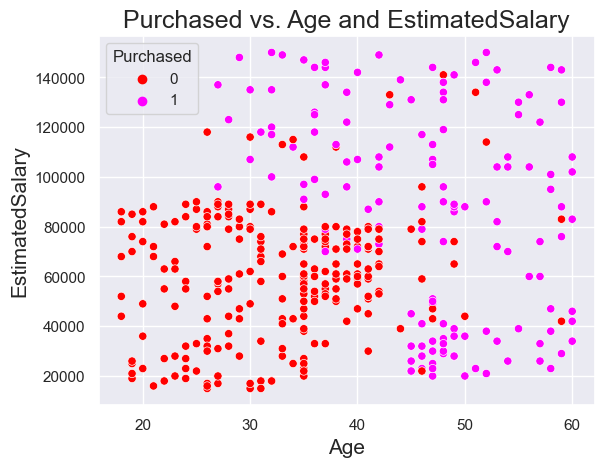

In [172]:
import seaborn as sns

# Create a scatterplot using Seaborn
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=data, palette=["red", "magenta"])

# Add axis labels and a title
plt.xlabel("Age", fontsize=15)
plt.ylabel("EstimatedSalary", fontsize=15)
plt.title("Purchased vs. Age and EstimatedSalary", fontsize=18)

# Show the plot
plt.show()



The scatterplot indicates that purchse is more in high salaried and aged people

# Split into Train and Test data

In [173]:
from sklearn.model_selection import train_test_split

X = data[["Age",
          "EstimatedSalary"]].to_numpy()

y = data["Purchased"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1)

In [174]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 2000.0022499987344


In [175]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [176]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)


[[array([   39, 77000]), 0, 2.0],
 [array([   40, 78000]), 0, 1000.0044999898751],
 [array([   31, 76000]), 0, 1000.0179998380029],
 [array([   59, 76000]), 1, 1000.2419707250841],
 [array([   37, 79000]), 1, 2000.0]]

In [177]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [178]:
# Test our function 
KNN_Predict(X_test[20], X_train, y_train, 5)

0

In [179]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [180]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 11)

0.26515151515151514

The less error indicates model is fitted perfectly

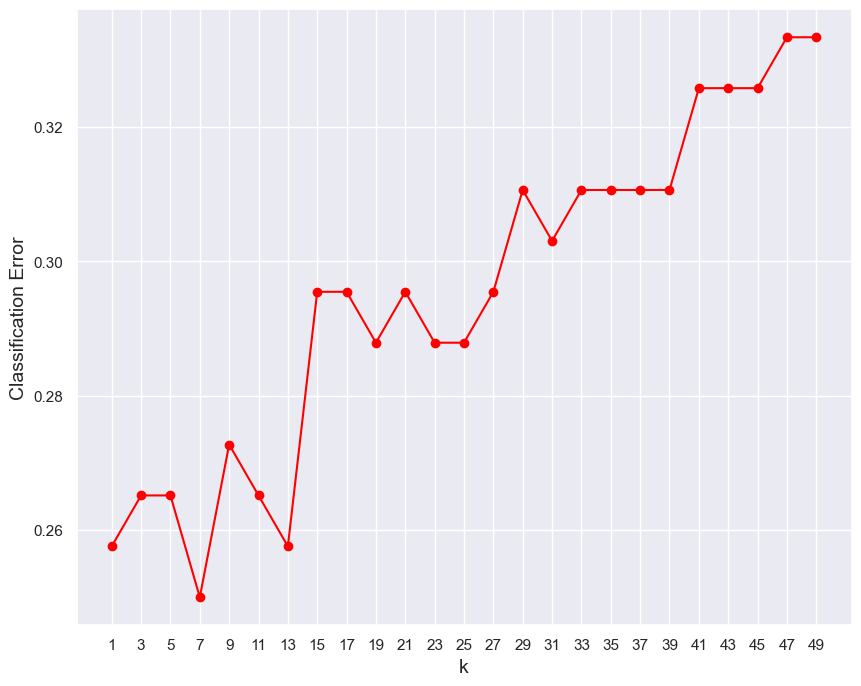

In [181]:
possible_k = [k for k in range(1, 50, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

The best suitable K value is near to 7

In [182]:
best_k = None
best_error = float('inf')

for k in range(1, len(X_train)):
    error = classification_error(X_test, y_test, X_train, y_train, k)
    if error < best_error:
        best_error = error
        best_k = k
        
print("Best k:", best_k)


Best k: 6


In [183]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 6)

0.24242424242424243

In [185]:
# Define the features and target
features = ["Age", "EstimatedSalary"]
target = "Purchased"

# Train the KNN model
X = data[features]
y = data[target]
k = 6
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X, y)

# Define a point to make a purchase recommendation for
point = np.array([[32, 150000]])

# Make the purchase recommendation
recommendation = model.predict(point)[0]

# Print the recommendation
if recommendation == 1:
    print("You should make the purchase!")
else:
    print("You should not make the purchase.")

You should make the purchase!


/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The model classifier is helpful to analyse the purchse and recommend where purchse will occur or not based on salary and age criteria